In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
##Helper function to sort mnist targets => 0123456789
def sort_by_target(mnist):
    ## Use of List Comprehension ([10*x for x in range (5)] == > returns list directly without creating a result variable)
    ## sorted() will sort list in ascending order (sorts tuples by first element, then second element, etc)
    ## enumerate() will return a tuple (index,value)
    ## [:,1] will return the second column (which is the index column)
    ## Note: We have two lists (train, and test) in order to have the last 10,000 elements be specified for testing
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000] ## np.array([1,2,3]) + 1 ==> [2,3]
    mnist.target[60000:] = mnist.target[reorder_test + 60000] ## np.array([1,2,3]) + 1 ==> [2,3]

In [5]:
import numpy as np
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [6]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([0, 0, 0, ..., 9, 9, 9], dtype=int8),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'p

* Datasets loaded by Scikit-Learn generally have a similar dictionary structure :
 - 'DESCR' key => describes the dataset
 - 'data' key => contains an array with one row per instance and one column per feature
 - 'target' key => contains array with labels

In [7]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [8]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
mnist['target']

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [10]:
X,y = mnist['data'],mnist['target']

In [11]:
X.shape ## 70,000 images , 784 features

(70000, 784)

In [12]:
y.shape

(70000,)

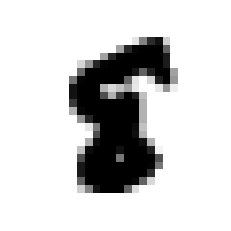

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[49000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off") ## hides x and y axis values
plt.show()

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Note: We should shuffle the training data because when doing cross-validation folds, we don't want some folds to not have some numbers. We also want to ensure that the model does not get multiples of the same number in a row. This could cause the model to perform badly.

In [15]:
import numpy as np

shuffle_index = np.random.permutation(60000) ## generates random values from [0,60000]
X_train,y_train = X_train[shuffle_index] , y_train[shuffle_index]

## Training a Binary Classifier

We are making a very basic Binary Classifier. We will train a model to classify between 5, and !5

In [16]:
y_train_5 = (y_train == 5) ## True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

### Stochastic Gradient Descent (SGD) Classifier

Note: SGD is able to handle very large datasets efficiently because it deals with training instances, one at a time

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
sgd_clf.predict([X[36000]])

array([ True])

## Performance Measures

### Measuring Accruacy Using Cross-Validation

#### Implement Cross-Validation fro Scratch

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42)

## Splits the training data 3 times into training and testing.
## Gets the fold for training and testing
## Trains the model on the training fold
## Makes predictions and prints out the accruacy 
for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred =clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print ( (n_correct / len(y_pred)) * 100)

96.48
96.36
92.4


In [20]:
from sklearn.model_selection import cross_val_score

## Does the same exact thing as the code above 
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9648, 0.9636, 0.924 ])

This model looks to perform very well! We will see in a bit why the model is not actually performing as well as we though

In [21]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X,y=None):
        return np.zeros((len(X),1),dtype=bool) ## Always return false 

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90665, 0.9139 , 0.9084 ])

Note: We created a classifier that always returns false for the training data ( !5 == 0, 5 == 1). We see that the classifier performed really well! 90% accurate; however, it should be noted that only 10% of the data actually consists of 5's. This means that the Binary Classifier we created above actually didn't perform as well as we thought (96% accruate). This is also shows the accruacy is not acutally the preferred performance measure for classifiers. If we have a skewed data set (i.e., when some classes are much more frequent than others) we can end up doing really well for one class are horribly for another.

### Measuring Accruacy Using Confusion Matrices

In [23]:
from sklearn.model_selection import cross_val_predict

## This function will end up making clean predictions for each instance on the training set. 
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5, cv=4) 

In [24]:
from sklearn.metrics import confusion_matrix

##Confusion Matrix:

##     |  predict_!5       predict_5
## -----------------------------------
## !5  |  correct         incorrect
##     |
##  5  | incorrect         correct
confusion_matrix(y_train_5,y_train_pred)

array([[53540,  1039],
       [ 1022,  4399]], dtype=int64)

#### Precision and Recall

In [25]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred) ## Predicts 5 correctly 70% of the time

0.808937109231335

In [26]:
recall_score(y_train_5,y_train_pred) ## detects 83% of the 5s

0.811473897804833

Note: F1 score calculates the harmonic mean of precision and recall, meaning it gives much more weight to lower values, unlike regular mean that treats all values the same. More information can be found on my physical notebook. (page 23)

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.8102035178193203

F1 scores favors classifiers that have similar precision and recall, but not every model may want that.

For example:
* If we want to filter out bad videos on youtube for children, we would much rather prefer to have a classifier that rejects many good videos (low recall) in order to ensure that almost every video is kid friendly (high precision)
* If we want to catch every buglar at a store we would much rather prefer to have a classififer that assumes most people are buglars, since this will ensure that almost every burglar is caught. 

#### Precision/Recall Tradeoff

In [28]:
y_scores = sgd_clf.decision_function([X[36000]]) ## gets score for each given instance
y_scores

array([1550.09732847])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

##### Choosing a Threshold

In [31]:
'''
Makes clean predictions for each instance in the data set, using 3-fold cross-validation,
and returns decision scores instead of the predictions
'''
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [32]:
from sklearn.metrics import precision_recall_curve

## computes precision and recall for all possible thresholds given by y_scores
## Note: precision and recall length = len(threshold) + 1
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

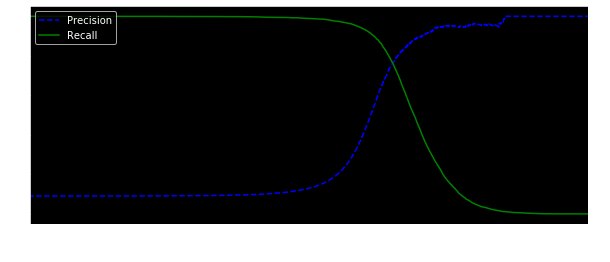

In [33]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision") ## [:-1] last element is 1
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall") ## [:-1] last element is 0
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    
plt.figure(figsize=(10,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-70000,40000])
plt.show()

* Note: The Precision curve is bumpier than the recall curve because precision may sometimes go down when the threshold is raised (usually it goes up though). This occurs when a value (6) scores higher than a true value (5). Increasing the threshold will kick out a true value before it kicks out the wrong value, causing lower precision and bumpier curves; therefore, a very well trained model will be very smooth because all the 5's will score higher than !5's. Refer to the text book (page 89) for more info

##### PR Curve

Text(0, 0.5, 'Precision')

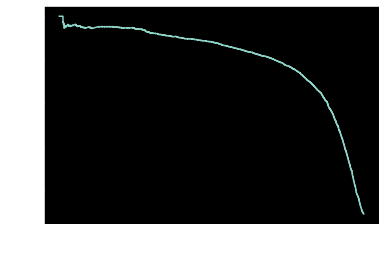

In [34]:
plt.plot(recalls,precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [35]:
y_train_pred_90 = (y_scores > 1000)

In [36]:
precision_score(y_train_5,y_train_pred_90)

0.7431913407821229

### Receiver Operating Characteristic (ROC) Curve

More information on Notebook (page 24)

In [37]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [51]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'b--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


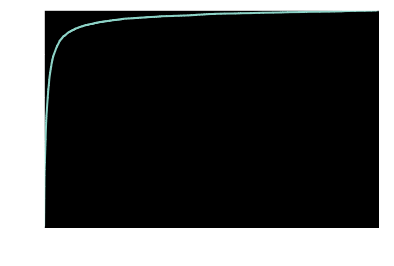

In [39]:
plot_roc_curve(fpr,tpr,thresholds)
plt.show()

* Note: There is an obvious tradeoff here. The higher the True Positive Rate is, the higher the False Positive Rate is as well. The dotted line represents the ROC curve of a purely random classifier; therefore, any good model will stay as far from that line as possible (in the top left corner)

#### Area Under the Curve (AUC)

* One way to measure classifiers is to measure the area under the curve, AUC (More info on Notebook page 24).
 - A perfect classifier will have a ROC AUC equal to 1, whereas, a purely random classifier will have a ROC AUC equal to 0.5

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9610427670362178

* Note: There is a time and place to use ROC curve as opposed to PR curve.
* Reference http://www.chioka.in/differences-between-roc-auc-and-pr-auc/ and page 25-26 of notebook to see when to use PR over ROC

#### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")


C:\Anaconda\envs\OReillyEnv-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\envs\OReillyEnv-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\envs\OReillyEnv-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


* predict_proba returns an array containing a row per instance and a column per class

In [43]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest,tpr_forest,threshold_forest = roc_curve(y_train_5,y_scores_forest)

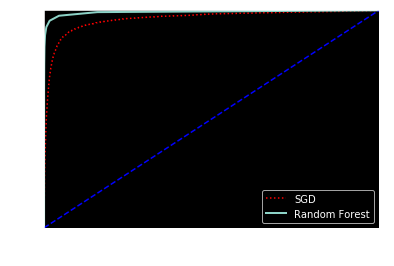

In [53]:
plt.plot(fpr,tpr,"r:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [54]:
roc_auc_score(y_train_5,y_scores_forest)

0.9921481635962301

In [64]:
precision_score(y_train_5,y_probas_forest[:,1] > .5)

0.9855800742844658

In [65]:
recall_score(y_train_5,y_probas_forest[:,1] > .5)

0.8321342925659473

## Multiclass Classification

* We can use a strategy to perform multiclass classification using multiple binary classifiers.
* For example:
 - To classify 10 digits, we create 10 binary classifiers (1-detector, 2-detector,etc), and choose the one with the highest decision score. This is known as ** *One-Versus-All* **